In [1]:
#imports
from shared_tools.make_datasets import x_train, y_train
from matplotlib import pyplot as plt
from typing import Iterable
import pickle, os, numpy as np
from PIL import Image
from deap import gp
from functools import partial
from simple_pred.pset import create_pset
from shared_tools.toolbox import create_toolbox
from tree import Tree, show_img


In [2]:
pset = create_pset(*x_train[0].shape)

In [3]:
aro, val = sum(a for a, _ in y_train) / len(y_train), sum(v for _, v in y_train) / len(y_train)

def show(a_v_pairs: list[tuple[float, float]], title: str) -> None:
    plt.scatter([a for a, _ in a_v_pairs], [v for _, v in a_v_pairs],  s=20, color=(0.1, 0.1, 1, 0.7))
    plt.scatter([aro], [val], s=100, color=(1, 0, 0, 0.7))
    plt.xlim((-1, 1))
    plt.ylim((-1, 1))
    plt.title(title)
    plt.show()


In [4]:
def models(dir_path: str, prefix='') -> list[gp.PrimitiveTree]:
    path = f"{dir_path}/data"
    models= [pickle.load(open(f"{path}/{file}.", 'rb')) for file in os.listdir(path)]
    return models

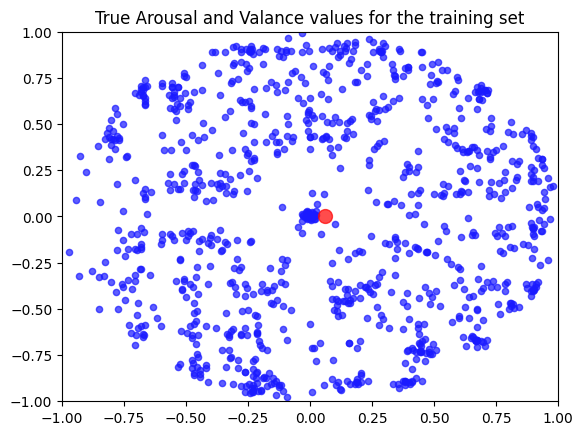

In [5]:
show(y_train, "True Arousal and Valance values for the training set")

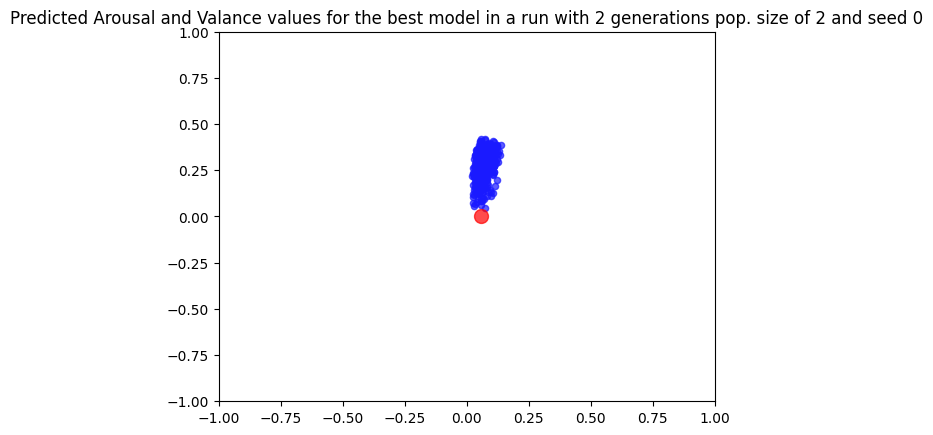

In [6]:
compile = partial(gp.compile, pset=pset)
def mean(predictions: list[tuple[float, float]]) -> tuple[float, float]:
    return np.array([a for a, _ in predictions]).mean(), np.array([v for _, v in predictions]).mean()

for run_info in models('simple_pred')[:2]:
    p = run_info.parameters
    seed, gens, pop_size = p.seed, p.generations, p.population
    ensemble = compile(run_info.best_individual)
    predictions = [mean(ensemble(img)) for img in x_train]
    
    show(predictions, f"Predicted Arousal and Valance values for the best model in a run with {gens} generations pop. size of {pop_size} and seed {seed}")


In [9]:
# Tests
run_info = models('simple_pred')[0]
f = Tree.of(run_info.best_individual, pset)
assert str(run_info.best_individual) == str(f), f"{model} != {f}"

In [14]:
from IPython.display import Image, display

for run_info in models('simple_pred')[:5]:
    model, model_num = run_info.best_individual, run_info.parameters.seed
    f = Tree.of(model, pset)
    for img_num, img in enumerate(x_train[:3]):
        f.save_graph(f"model{model_num}-{img_num}.png", img)
    print(f"Model {model_num} drawn")


Model 0 drawn


In [15]:
!rm _treedata/*